In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
np.random.seed(100)

In [3]:
# Set up training data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_x, train_y, test_x, test_y = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# Set up place holders
# [None, 784], where None allows different dimensions. e.g batch size of 10 would be [10,784]
X = tf.placeholder("float", [None, 784])
# MNIST is a classification exercise with 10 different labels.
Y = tf.placeholder("float", [None, 10])
# Initialize parameter w, with random values sample from normal distribution.
w = tf.Variable(tf.random_normal([784, 10], stddev=0.1))

In [5]:
# Set up logistic regression model.
target = tf.matmul(X,w)
# Apply softmax and compare two different pdf to get loss.
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=target, labels=Y))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
# When we go to predict, evaluate the argmax.
predict = tf.argmax(target, axis=1)

In [6]:
from sklearn.metrics import confusion_matrix
epochs = 20
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(epochs):
        for start, end in zip(range(0, len(train_x), 128), range(128, len(train_x)+1, 128)):
            sess.run(trainer, feed_dict={X: train_x[start:end], Y: train_y[start:end]})
        print(i, np.mean(np.argmax(test_y, axis=1) == sess.run(predict, feed_dict={X: test_x})))
        
    # This is not really necessary, just included for visualization.    
    cf_mat = confusion_matrix(np.argmax(test_y, axis=1), sess.run(predict, feed_dict={X: test_x}))

(0, 0.89190000000000003)
(1, 0.90349999999999997)
(2, 0.90990000000000004)
(3, 0.91310000000000002)
(4, 0.91379999999999995)
(5, 0.91539999999999999)
(6, 0.9173)
(7, 0.91810000000000003)
(8, 0.91839999999999999)
(9, 0.91930000000000001)
(10, 0.9194)
(11, 0.92010000000000003)
(12, 0.92030000000000001)
(13, 0.92069999999999996)
(14, 0.92110000000000003)
(15, 0.92159999999999997)
(16, 0.92190000000000005)
(17, 0.92190000000000005)
(18, 0.92200000000000004)
(19, 0.92179999999999995)


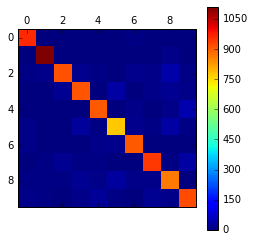

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# (rows = true, columns = predicted)
# We can see that the model had very little trouble with "1" while "5" posed some issues.
plt.matshow(cf_mat)
plt.colorbar()